In [1]:
import numpy as np
import tensorflow as tf
import datetime
import matplotlib.pyplot as plt

In [2]:
# Prepare training and test data
x_train = np.array([2, 3, 4, 5, 6, 7, 8, 9])
y_train = 2 * x_train + 1


In [3]:
x_test = x_train[6:]
y_test = y_train[6:]

In [4]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1, activation=None)
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')



In [6]:
 #Define the TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2
)

In [7]:
# Train the model with the TensorBoard callback
history = model.fit(
    x_train, y_train, epochs=30, validation_data=(x_test, y_test), callbacks=[tensorboard_callback]
)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 160.1793 - val_loss: 313.2352
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 159.0723 - val_loss: 311.1371
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - loss: 157.9631 - val_loss: 309.0341
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 156.8516 - val_loss: 306.9262
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 155.7378 - val_loss: 304.8134
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 154.6219 - val_loss: 302.6958
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 153.5037 - val_loss: 300.5732
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - loss: 152.3833 - val_loss: 298.4457
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 151.2607 - val_loss: 296.3132
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - loss: 150.1357 - val_loss: 294.1757
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - loss: 149.0085 - val_loss: 292.0328
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━

In [8]:
# Evaluate the model on test data
test_loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 250.1530
Test Loss: 250.15301513671875


In [9]:
# Make predictions on test data
y_pred = model.predict(x_test)
print("Predictions:", y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predictions: [[2.098691]
 [2.318962]]


In [10]:
 #Print predictions against actual values
for i in range(len(y_test)):
    print(f"y_test: {y_test[i]}, y_pred: {y_pred[i]}")



y_test: 17, y_pred: [2.098691]
y_test: 19, y_pred: [2.318962]


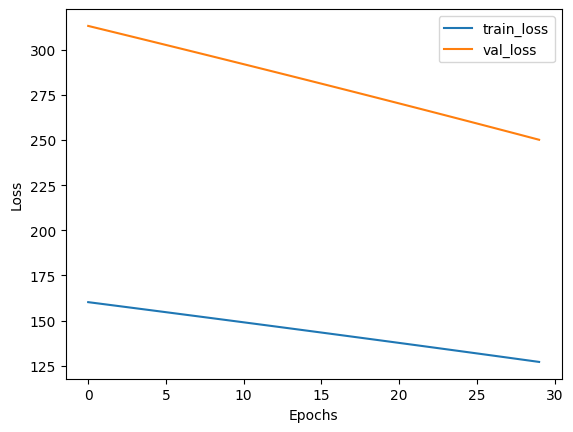

In [11]:
 #Plot training & validation loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()